# ROC

In this exercise we will plot the ROC curve for a classifier on the MNIST dataset. We will only use the digits 0 and 1 from MNIST, so it becomes a binary classification problem that we can approach with a logistic regression.

The MNIST images has 28x28=784 pixels, but we will only use a limited subset of these.

In [1]:
!wget https://storage.googleapis.com/machine-learning-course-datasets/mnist_train_zero_one.csv -O /tmp/train.csv

--2019-10-02 12:12:07--  https://storage.googleapis.com/machine-learning-course-datasets/mnist_train_zero_one.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22933253 (22M) [application/octet-stream]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]  21.87M  86.9MB/s    in 0.3s    

2019-10-02 12:12:12 (86.9 MB/s) - ‘/tmp/train.csv’ saved [22933253/22933253]



**number_of_columns** defines how many columns to use as features. We will pick random columns to use in the classification model.

In [0]:
number_of_features=20

In [0]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split

random.seed(0)
features=random.sample(list(data.columns[2:]), number_of_features)
data=pd.read_csv("/tmp/train.csv")
X_train, X_test, y_train, y_test = train_test_split(data[features], data["label"], train_size=0.5, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X_train, y_train)
probs = zip(classifier.predict(X_test)-np.array(y_test).flatten(), classifier.predict_proba(X_test))
probs = sorted(list(probs), key=(lambda x: x[1][0]))

For the ROC-curve plot we need to find the true positive rate (tpr) and the false positive rate (fpr) at different threshold values.

In [0]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, classifier.predict_proba(X_test)[:,0], pos_label=0)
roc_auc=metrics.auc(fpr, tpr)

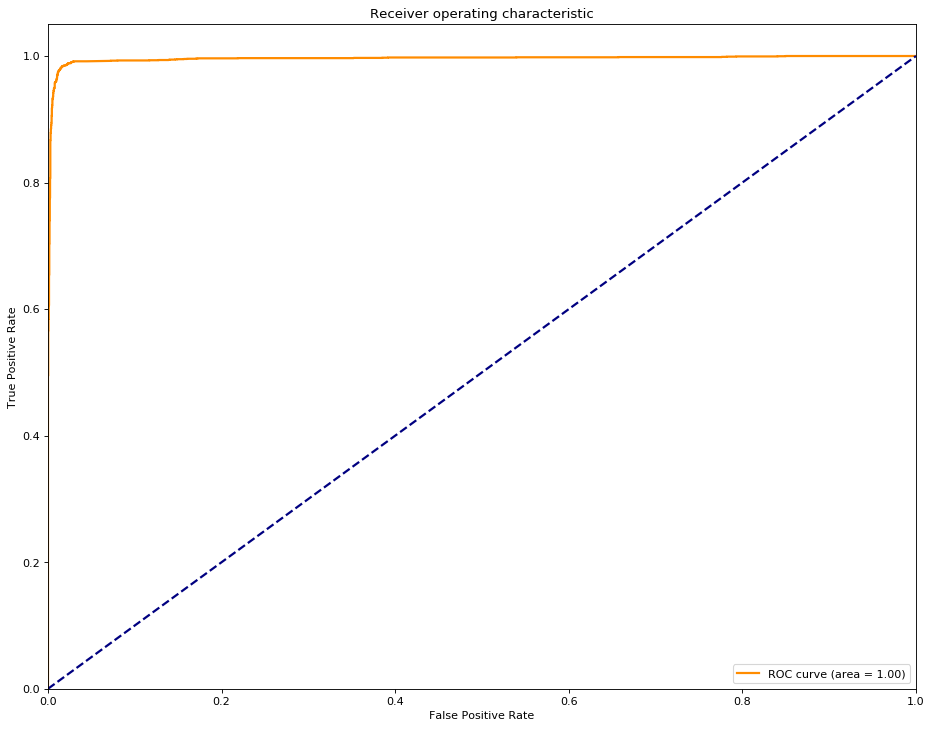

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 11), dpi= 80, facecolor='w', edgecolor='k')
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

How do you thinkt the ROC-curve looks?
Is this a good classifier?

Try to go back and change **number_of_columns** and redo the calculations.

How does this change the ROC-curve?